In [1]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
dataset_name = 'sensorless'
shapes = {
    'S': (39, 30, 20),
    'V2': (21,),
    'V3': (16,),
    'V4': (13,),
    'V5': (11,)
}
epochs = 5
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([48], [11])


### S(X,X,X)

Average elapsed k-fold validation time: 443.94009 sec
Last measures: [0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094586968422, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09090987592935562, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198]
Loss history average: [0.0859451  0.09083878 0.0908445  0.09084531 0.09084549]
Measure history average: [0.09090947 0.09090947 0.09090948 0.09090948 0.09090948]
Measure history worst: [0.09090969 0.09090964 0.09090971 0.09090971 0.09090972]
Measure history best: [0.09090943 0.09090943 0.09090943 0.09090943 0.09090943]


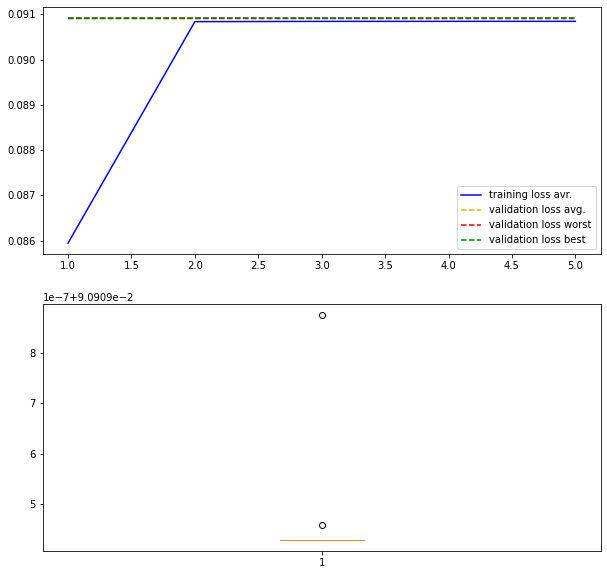

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 502.31294 sec
Last measures: [0.09090720862150192, 0.0909094288945198, 0.0909094288945198, 0.0909094586968422, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094512462616, 0.0909094288945198, 0.0909094288945198, 0.09090599417686462, 0.0909094288945198, 0.0909094512462616, 0.0909094288945198, 0.0909094288945198, 0.09090134501457214, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198]
Loss history average: [0.08916436 0.08785033 0.0879908  0.08823442 0.08868072]
Measure history average: [0.09090899 0.09090937 0.09090939 0.09090941 0.09090942]
Measure history worst: [0.09090944 0.09090943 0.09090944 0.09090943 0.09090943]
Measure history best: [0.09090781 0.0909092  0.09090927 0.09090929 0.09090934]


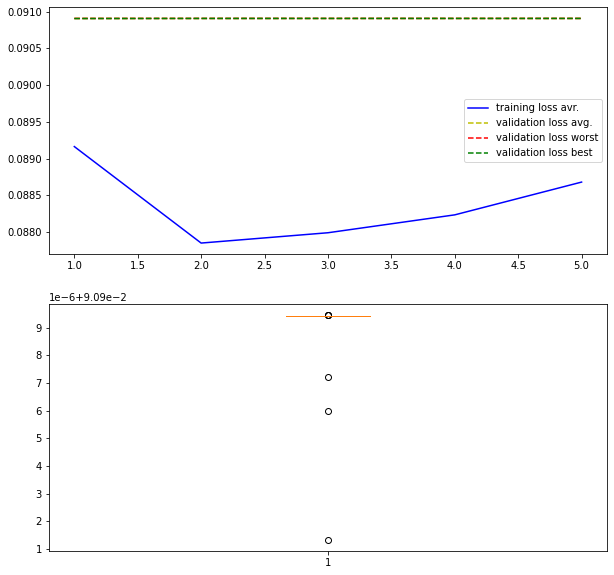

In [4]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 472.77850 sec
Last measures: [0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09090794622898102, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09090530127286911, 0.0909094363451004, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09090809524059296, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198]
Loss history average: [0.08955504 0.0890771  0.08916495 0.08933082 0.08932989]
Measure history average: [0.0909092  0.09090942 0.09090943 0.09090943 0.09090943]
Measure history worst: [0.09090943 0.09090943 0.09090943 0.09090943 0.09090943]
Measure history best: [0.09090861 0.09090939 0.09090943 0.09090943 0.09090943]


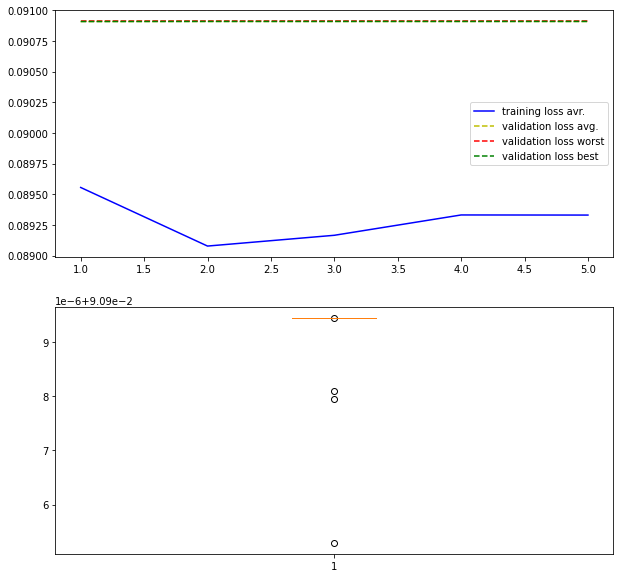

In [5]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(3)

Average elapsed k-fold validation time: 259.89548 sec
Last measures: [0.090904101729393, 0.0909094288945198, 0.0909094512462616, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09090012311935425, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094586968422, 0.0909094288945198, 0.09090796858072281, 0.0909094288945198, 0.0909094288945198, 0.0909094512462616, 0.0909094288945198]
Loss history average: [0.0899984  0.08931655 0.08935949 0.08949251 0.08962395]
Measure history average: [0.09090896 0.09090933 0.09090942 0.09090912 0.09090934]
Measure history worst: [0.09090947 0.09090944 0.09090944 0.09090944 0.09090943]
Measure history best: [0.09090783 0.09090898 0.09090932 0.09090757 0.09090883]


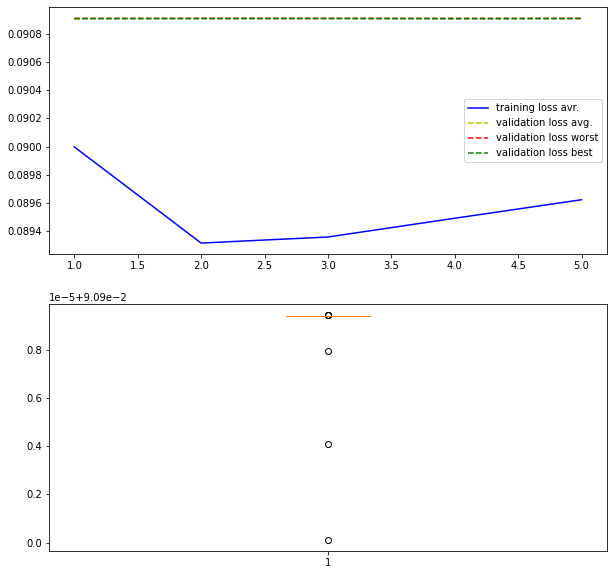

In [6]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(3)

Average elapsed k-fold validation time: 311.62306 sec
Last measures: [0.0909094288945198, 0.0909152403473854, 0.0909094288945198, 0.09090948104858398, 0.09090189635753632, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909087210893631, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09091003239154816, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198]
Loss history average: [0.08938964 0.08878635 0.08888237 0.08911528 0.08929572]
Measure history average: [0.09090979 0.09090969 0.09090973 0.09090978 0.09090957]
Measure history worst: [0.09091066 0.09091071 0.09091106 0.09091137 0.09091014]
Measure history best: [0.09090943 0.09090929 0.09090943 0.09090943 0.09090943]


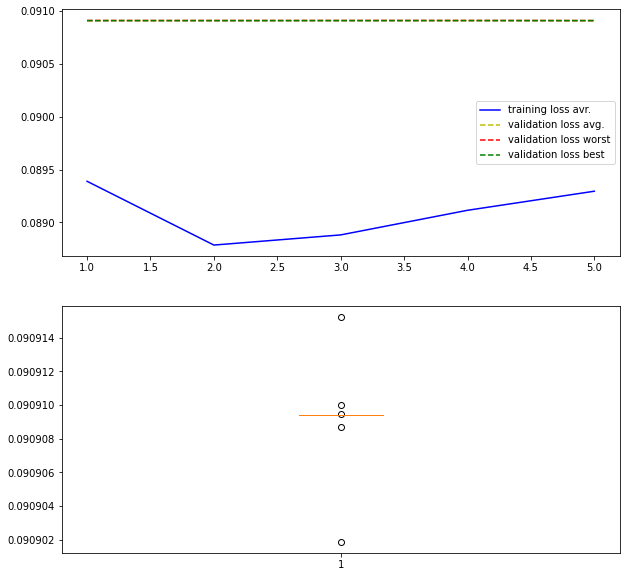

In [7]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(4)

Average elapsed k-fold validation time: 260.31439 sec
Last measures: [0.09090554714202881, 0.0909094288945198, 0.09090948849916458, 0.09090947359800339, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09125572443008423, 0.09091045707464218, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09090398252010345, 0.0909094288945198, 0.0909094363451004, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094363451004, 0.09090985357761383, 0.0909094288945198, 0.09090333431959152, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198]
Loss history average: [0.08938623 0.08813142 0.08821785 0.08824628 0.08838546]
Measure history average: [0.09092853 0.09092386 0.09092256 0.09092175 0.09092106]
Measure history worst: [0.0910269  0.09099605 0.09098806 0.09098308 0.09097889]
Measure history best: [0.09090825 0.09090925 0.09090934 0.09090946 0.09090946]


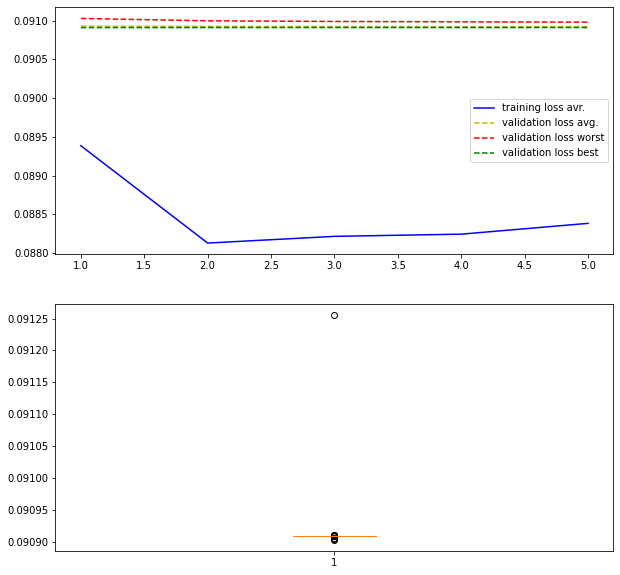

In [8]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(4)

Average elapsed k-fold validation time: 308.20358 sec
Last measures: [0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094586968422, 0.0909094288945198, 0.0909094363451004, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094363451004, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.090909443795681, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198]
Loss history average: [0.08926986 0.08909271 0.08942631 0.08960705 0.08950872]
Measure history average: [0.09090944 0.09090944 0.09090946 0.09090947 0.09090954]
Measure history worst: [0.09090945 0.09090944 0.09090961 0.09090968 0.09090969]
Measure history best: [0.09090943 0.09090943 0.09090943 0.09090943 0.09090943]


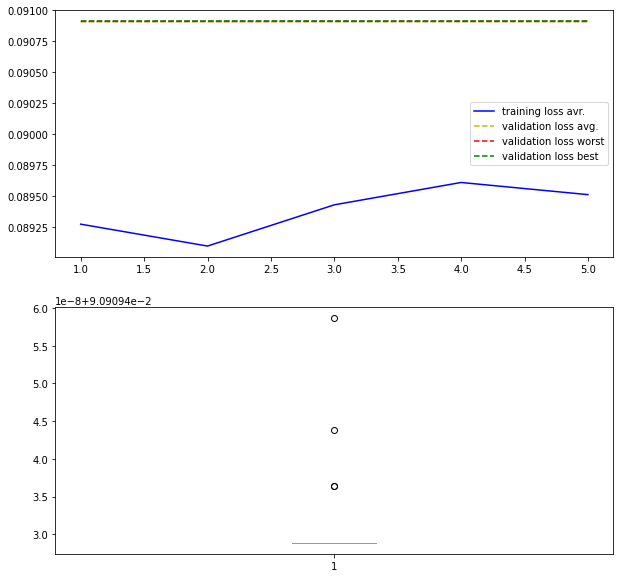

In [9]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(5)

Average elapsed k-fold validation time: 261.20305 sec
Last measures: [0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09126327931880951, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094363451004, 0.0909094288945198, 0.09090985357761383, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09088828414678574, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09090162813663483, 0.0909094288945198, 0.0909094288945198, 0.09090948849916458, 0.0909094288945198]
Loss history average: [0.0900649  0.08952187 0.08949224 0.08921378 0.08955544]
Measure history average: [0.09092028 0.09092188 0.0909219  0.09403648 0.09093333]
Measure history worst: [0.0909802  0.09098621 0.09098509 0.09098496 0.09098478]
Measure history best: [0.0909052  0.09090745 0.0909084  0.09090919 0.09090944]


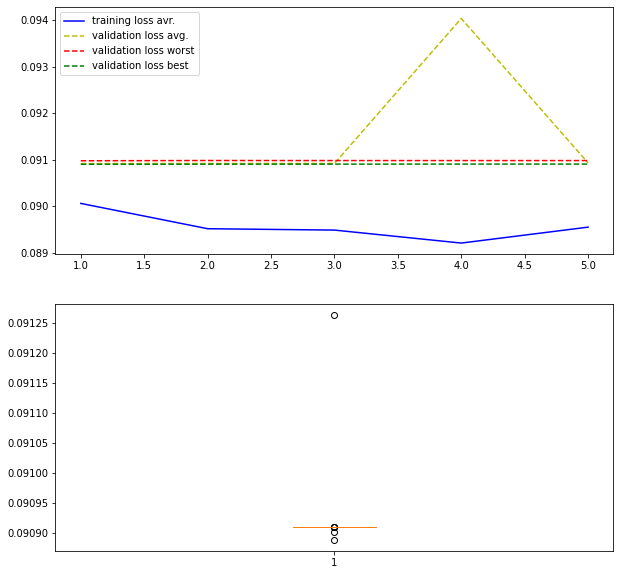

In [10]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V5'], inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(5)

Average elapsed k-fold validation time: 309.48448 sec
Last measures: [0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09090474247932434, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909099206328392, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09090874344110489, 0.14179177582263947, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.0909094288945198, 0.09063983708620071, 0.0909094288945198, 0.0909094288945198]
Loss history average: [0.08787237 0.08848708 0.08937286 0.08940356 0.08957561]
Measure history average: [0.09689058 0.09362292 0.09344053 0.09587962 0.09563675]
Measure history worst: [0.10923585 0.1072164  0.10612001 0.10369376 0.1010859 ]
Measure history best: [0.09085551 0.090883   0.09088518 0.09089922 0.09089862]


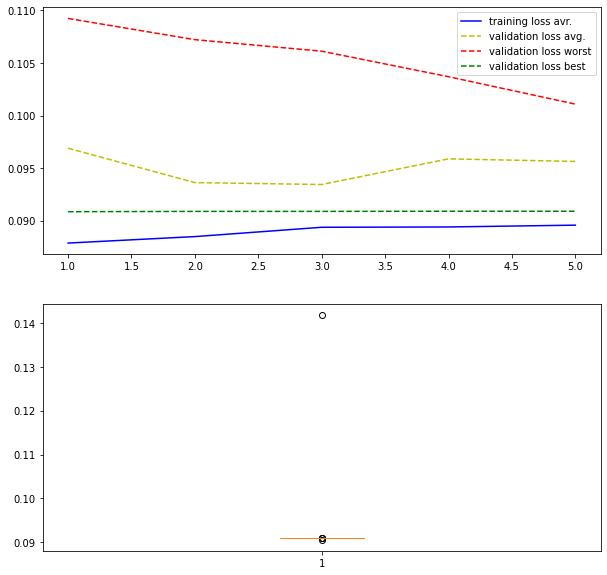

In [11]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V5'], inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)